# Merian Part 1: catalogs and images

**Explore the morphology of dwarf galaxies in H$\alpha$ using the Merian Survey data**

**Prerequisites**
- Need to install `reproject` and `photutils` and `cmasher`
- Finished the Photometric Redshift notebook

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord

# We can beautify our plots by changing the matpltlib setting a little
plt.rcParams['font.size'] = 18
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 90
plt.rcParams['axes.linewidth'] = 2

In [2]:
required_packages = ['statmorph', 'sep']  # Define the required packages for this notebook

import sys
import subprocess

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Download utils.py
    !wget -q -O /content/utils.py https://raw.githubusercontent.com/AstroJacobLi/ObsAstGreene/refs/heads/main/book/docs/utils.py
    # Function to check and install missing packages
    def install_packages(packages):
        for package in packages:
            try:
                __import__(package)
            except ImportError:
                print(f"Installing {package}...")
                subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
    # Install any missing packages
    install_packages(required_packages)
else:
    # If not in Colab, adjust the path for local development
    sys.path.append('../../')

# Get the directory right
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive/')
  os.chdir('/content/drive/Shareddrives/AST207/data')
else:
    os.chdir('../../../_static/ObsAstroData/')

In [5]:
sys.path.append('/Users/jiaxuanl/Dropbox/Courses/ObsAstGreene/book/docs/')

In [6]:
from utils import pad_psf, show_image

## Part 1: Understand the Merian survey

The Merian survey uses two medium-band filters (N540 and N708) on the 4-m Blanco telescope to obtain deep imaging data for dwarf galaxies. From the Photometric Redshift notebook, we already know that galaxies at different redshifts will have different magnitudes in certain bands as the emission lines pass through these filters. In this notebook, we start to work on the real Merian data and try to have a deeper understanding of photo-$z$s. To start with, we will look at how the $i - \rm N708$ color depends on the galaxy's redshift. 

In the cell below, we load the master catalog and only select those galaxies with solid spectroscopic redshifts (`cat['z_desi']` is the spectroscopic redshift), such that we have a truth for redshift to compare with photo-zs. We also narrow the redshift range to $0 < z < 0.6$. 

We will also convert the measured "flux" to magnitudes:
$$ m = -2.5 \log10 (f) + \mathrm{ZP},$$
where $f$ is the flux (in any unit), and $\rm ZP$ is the zeropoint. Note that different surveys use different flux units (e.g., some use micro-Jansky, some fix their zeropoint to 22.5 mag, etc.). For Merian, we use $\rm ZP = 31.4$, such that $f$ has a unit of nano-Jansky. 

In [10]:
cat = Table.read('./merian/cosmos_Merian_DR1_photoz_v1.0.fits')
cat = cat[cat['z_desi'] != -99.0]
cat = cat[cat['good_desi']] # ensure good DESI spec-z
cat = cat[cat['z_desi'] < 0.6]

zp = 31.4 # this is the photometric zeropoint for Merian
for filt in ['g', 'r', 'i', 'N708', 'N540']:
    cat[f'mag_{filt}'] = zp - 2.5 * np.log10(cat[f'{filt}_gaap1p0Flux_Merian'])
z_spec = cat['z_desi']

Now we have a sample of galaxies with solid spectroscopic redshifts (spec-z) in the COSMOS field. Let's plot the $i - \rm N708$ color as a function of spec-z in the following plot. As a reminder, you can get the $i-\rm N708$ using `cat['mag_i'] - cat['mag_N708']`. 

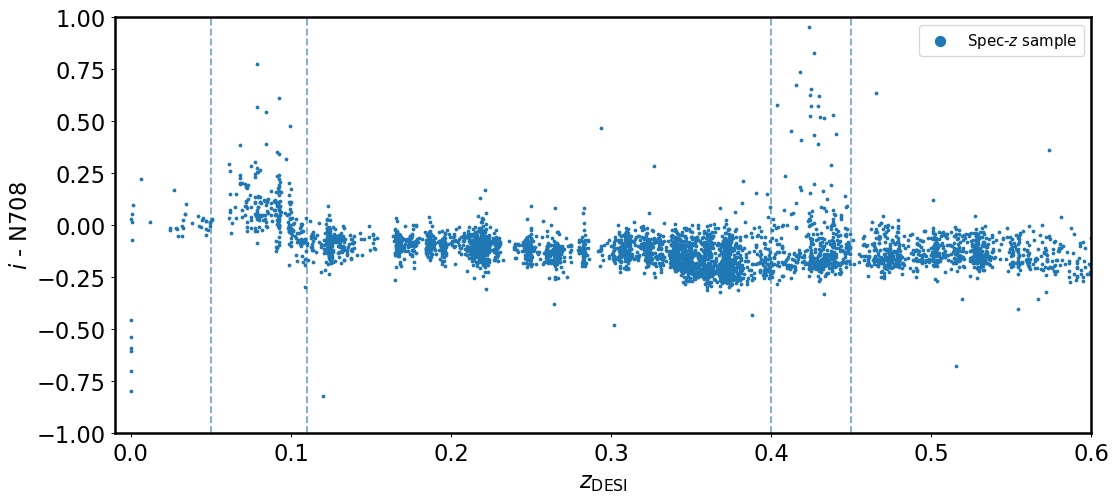

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), sharey=True)

plt.sca(axes)
sct = plt.scatter(cat['z_desi'], cat['mag_i'] - cat['mag_N708'], s=4, label='Spec-$z$ sample')

plt.axvline(0.05, ls='--', alpha=0.6)
plt.axvline(0.11, ls='--', alpha=0.6)

plt.axvline(0.4, ls='--', alpha=0.6)
plt.axvline(0.45, ls='--', alpha=0.6)

plt.ylim(-1, 1.0)
plt.xlim(-0.01, 0.6)
plt.xlabel('$z_\mathrm{DESI}$')
plt.ylabel('$i$ - N708')
leg = plt.legend(loc='upper right', fontsize=12, scatterpoints=1, frameon=True, markerscale=4)
plt.subplots_adjust(wspace=0.05)

**Exercise 1**

1. From the above figure, we see two spikes at $0.05 < z < 0.11$ and $0.4 < z < 0.45$. What is causing these two spikes? (You may use the interactive tools in the Photometric Redshift notebook)

2. Why galaxies have $i - \rm N708 \approx 0$ at $z=0.2-0.3$?

3. What can we say about the redshift if we only have the N708 filter? Will there be any degeneracy? 

In [ ]:
## your answer

**Exercise 2**
1. Plot the figure above, but color-code the data points using the $r- \rm N540$ color. Use the colormap `bwr`, and set the colorbar min value to -0.3, and max value to 0.3. 
2. Now revisit the two spikes at $0.05 < z < 0.11$ and $0.4 < z < 0.45$. Do they have the same $r-\rm N540$ color? Do you now have a way to distinguish the second spike from the first spike? 

In [ ]:
## your answer

From the exercises above, we now have a good understanding of why we need two filters (aka N540 and N708) to ping down the photometric redshift of galaxies. Using more advanced tools, we were able to derive the photometric redshifts for Merian galaxies using the $grizy$ broad-bands plus the two medium bands (N540 and N708). The derived photo-z is `cat['zphot_1p0']`. 

**Exercise 3**
1. Make a scatter plot for the spec-z v.s. photo-z. Also, plot a one-to-one line for reference, and set `xlim` and `ylim` to `(0, 0.6)`. Make sure to add axis labels.
2. Is photo-z a perfect indicator for a galaxy's redshift? Can we 100% trust it?

In [ ]:
## your answer

## Part 2. Scaling relations

In this section, we will only select those galaxies in our redshift range ($0.05 < z < 0.11$, i.e., the first spike). Then, let's explore the correlation among the physical properties. 

In [47]:
cat_inband = cat[(z_spec < 0.11) & (z_spec > 0.05) & (cat['mag_i'] < 21.5)] # we require i_mag < 21.5 to make sure all galaxies have high S/N

**Exercise 4**

1. Plot the histogram of the log10(stellar mass) (`mass_1p0`), redshift (`z_desi`), `i-N708` color, and the log10(star-formation rate) (`sfr_1p0`).
2. Make a scatter plot for log star formation rate v.s. log stellar mass. Do you see any correlation? Describe it.
3. Plot any other combinations of properties that you think might be interesting. Comment on what you see. You can also color-code the scatter plot by a third quantity. 

In [ ]:
## your answer

## Part 3: Enjoy Merian images!

We've been playing with catalogs so far. But the Merian images are truly amazing! In this part, let's take a look at those images and try to make a color-composite image by combining the Hyper Suprime-Cam (HSC) data with Merian. 

The Merian (and the corresponding HSC) images are available in google drive. 

In [56]:
merian = Table.read("./merian/merian_dr1_specz_inband_lowmass_allbands.csv")
cutout_dir = "./merian/cutouts/"

In [59]:
len(merian)

2684

In [67]:
from astropy.io import fits
i = 1850
obj = merian[i]
coord = SkyCoord(obj['coord_ra_Merian'], obj['coord_dec_Merian'], unit='deg')
cname = obj['cname']

# Open images and psfs
cutouts = {band: fits.open(os.path.join(cutout_dir, "", f"{cname}_HSC-{band}.fits"))[1].data for band in ['g', 'r', 'i', 'z']}
cutouts['N708'] = fits.open(os.path.join(cutout_dir, f"{cname}_N708_merim.fits"))[1].data

We use the function `show_image` to display the data:

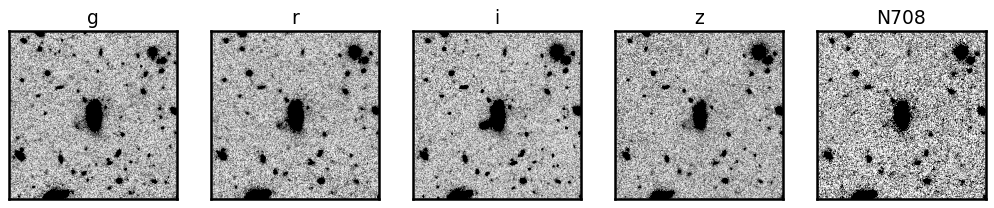

In [72]:
percl = 92 # this changes the contrast and dynamic range of the display

fig, axes = plt.subplots(1, 5, figsize=(14, 3))
for i, band in enumerate(cutouts.keys()):
    show_image(cutouts[band], fig=fig, ax=axes[i], cmap='Greys', percl=percl)
    axes[i].set_title(band, fontsize=15)

**Exercise 5**

Change the `percl` parameter from 92 to 99.9, and comment on how that changes the look of the galaxy. If you are interested in the low-surface-brightness features, should you tune `percl` low or high?

In [ ]:
## your answer

Black & White images are cool but a bit boring... Let's make them colorful! Here we use the method in [Lupton et al. (2004)](https://ui.adsabs.harvard.edu/abs/2004PASP..116..133L/abstract). 

Text(0, 1.02, 'g')

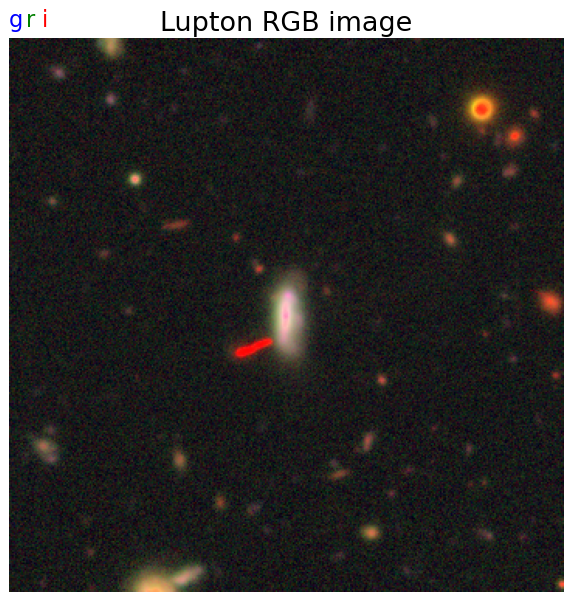

In [86]:
from astropy.visualization import make_lupton_rgb
rgb = make_lupton_rgb(cutouts['i'], cutouts['r'], cutouts['g'], stretch=1, Q=5, minimum=-0.1)
plt.figure(figsize=(8, 8))
plt.imshow(rgb, origin='lower')
plt.axis('off')

ax = plt.gca()
plt.title('Lupton RGB image')
plt.text(0.06, 1.02, 'i', transform=ax.transAxes, color='red')
plt.text(0.03, 1.02, 'r', transform=ax.transAxes, color='green')
plt.text(0, 1.02, 'g', transform=ax.transAxes, color='blue')

**Exercise 6**

There are three parameters in the `lupton_rgb` function: `stretch`, `Q`, and `minimum`. Try to play with these parameters, and find a combination that makes the most beautiful color image. 

In [ ]:
## your answer

### (Optional) Part 4: Sersic fitting

A galaxy's light distribution is often described by a [Sersic](https://en.wikipedia.org/wiki/S%C3%A9rsic_profile) model. For a comprehensive introduction to the Sersic model, see [this paper](https://arxiv.org/abs/astro-ph/0503176). Here let's try to fit a Sersic model to the Merian galaxies. 

<!-- - We can make them do their own Source Extractor: define threshold, then do detection, and generate a segmantation map -->
<!-- - Then we use `statmorph` to do the Sersic fit + other non-par measurement -->

In [167]:
from astropy.io import fits
i = 1850
obj = merian[i]
coord = SkyCoord(obj['coord_ra_Merian'], obj['coord_dec_Merian'], unit='deg')
cname = obj['cname']

In [168]:
# Open images and psfs
cutouts = {band: fits.open(os.path.join(cutout_dir, "", f"{cname}_HSC-{band}.fits"))[1].data for band in ['g', 'r', 'i', 'z']}
cutouts['N708'] = fits.open(os.path.join(cutout_dir, f"{cname}_N708_merim.fits"))[1].data

cutout_headers = {band: fits.open(os.path.join(cutout_dir, "", f"{cname}_HSC-{band}.fits"))[1].header for band in ['g', 'r', 'i', 'z']}
cutout_headers['N708'] = fits.open(os.path.join(cutout_dir, f"{cname}_N708_merim.fits"))[1].header

psfs = {band: fits.open(os.path.join(cutout_dir, "", f"{cname}_HSC-{band}_psf.fits"))[0].data for band in ['g', 'r', 'i', 'z']}
psfs['N708'] = fits.open(os.path.join(cutout_dir, f"{cname}_N708_merpsf.fits"))[0].data

In [169]:
import statmorph
from photutils.segmentation import detect_threshold, detect_sources
from astropy.convolution import convolve_fft
from utils import get_img_central_region

In [170]:
# We only include the central region of the bigger image
# This makes the fitting faster
imgs = get_img_central_region(cutouts, 150)
img = imgs['N708']

We first need to detect the "footprint" of the galaxy that we are intersted. We use `detect_sources` function in `photutils.segmentation` to extract sources that are $1.5\sigma$ above the noise level. The `detect_threshold` function roughly estimates the background noise level. 

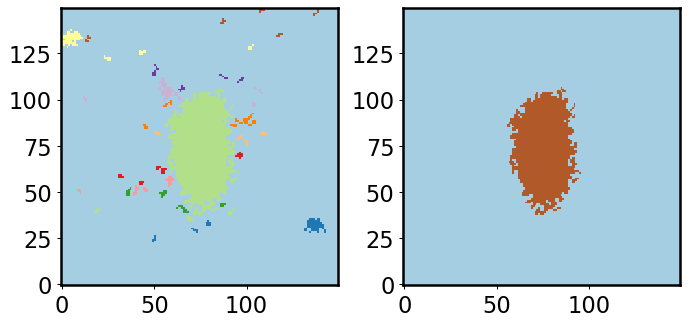

In [171]:
threshold = detect_threshold(img, 1.5)
npixels = 5  # minimum number of connected pixels
segmap = detect_sources(img, threshold, npixels)
obj_mask = ~segmap.data_ma.mask

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(9, 4))
ax1.imshow(segmap, origin='lower', cmap='Paired', interpolation='none')

ind = segmap.data[img.shape[1]//2, img.shape[0]//2]
segmap.keep_label(ind)

ax2.imshow(segmap, origin='lower', cmap='Paired', interpolation='none')

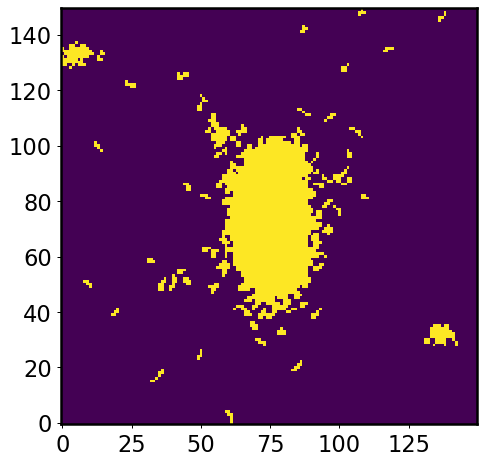

In [172]:
plt.imshow(obj_mask, interpolation='none')

In the left panel, we show the "segmentation map" for all sources above $1.5\sigma$. Many sources are detected. However, we only want the central one, so we use `segmap.keep_label(ind)`. The right panel shows the segmentation map after this step. This segmentation map will be used in the Sersic fitting.

Sersic fitting needs the background noise level to calculate the chi-square. Let's use `photutils.background.Backgroud2D` to estimate the background noise. In this step, we will provide an object mask `obj_mask` such that the light from astrophysical sources will not bias the background estimation. `obj_mask` was constructed when we first extracted the segmentation map: `obj_mask = ~segmap.data_ma.mask`. In this mask, `True` means that the pixel belongs to a real source and should be masked; `False` means that it should not be masked. 

In [173]:
from photutils.background import Background2D
bkg = Background2D(img, 64, mask=obj_mask)

This `bkg` object contains many information about the background, including the rms of the background level. This is exactly what we need.

In [174]:
bkg.background_rms

array([[0.0804221 , 0.0804221 , 0.0804221 , ..., 0.08041927, 0.08041922,
        0.08041916],
       [0.0804221 , 0.0804221 , 0.0804221 , ..., 0.08041926, 0.0804192 ,
        0.08041915],
       [0.0804221 , 0.0804221 , 0.0804221 , ..., 0.08041923, 0.08041917,
        0.08041911],
       ...,
       [0.08022214, 0.08022214, 0.08022214, ..., 0.08032062, 0.08032095,
        0.08032127],
       [0.08022214, 0.08022214, 0.08022214, ..., 0.08032009, 0.08032042,
        0.08032075],
       [0.08022214, 0.08022214, 0.08022214, ..., 0.08031956, 0.0803199 ,
        0.08032023]])

Now it's time to do Sersic fitting! We use a package called `statmorph`. It also provides many other measurements. See [its documentation](https://statmorph.readthedocs.io/en/latest/) for details.

In [175]:
source_morphs = statmorph.source_morphology(
    img, segmap, weightmap=bkg.background_rms, psf=psf)
morph = source_morphs[0]

That's it! Let's visualize the results:

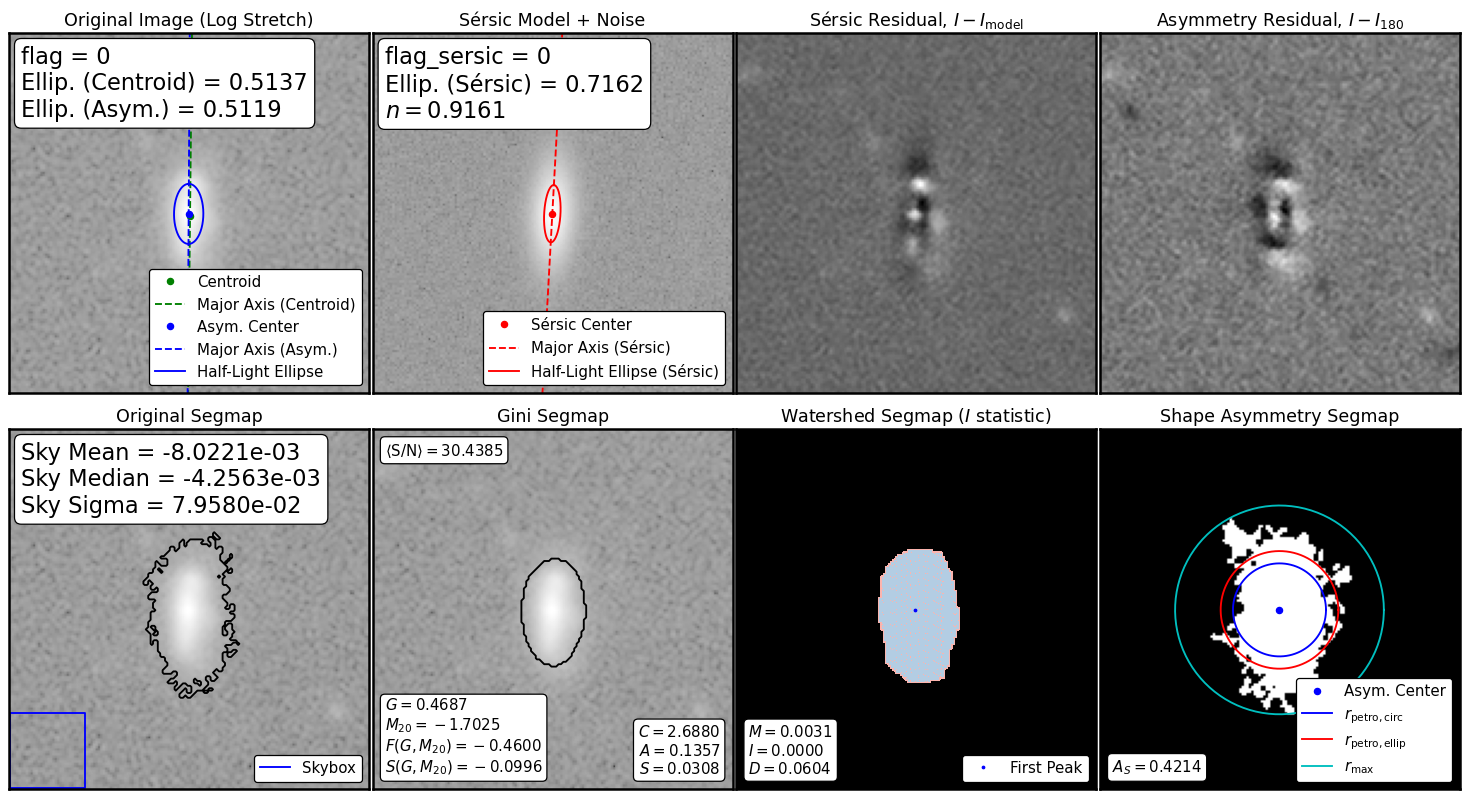

In [176]:
from statmorph.utils.image_diagnostics import make_figure
fig = make_figure(morph)

We should only focus on the first three panels. The first panel shows the original image, the second shows the best-fit Sersic model, and the third shows the residual. Overall, the fit is pretty good! As seen in the residual, there are some structures not captured by the Sersic model, e.g., the bright blob above the center of the galaxy. Sersic model is not perfect, but it's useful. 

Let's check the best-fit parameters, such as the half-light radius, ellipticity, etc. In this way, we can measure the properties of many more galaxies.

In [183]:
print('Half light radius:', morph.sersic_rhalf)
print('Ellipticity:', morph.sersic_ellip)
print('Sersic index:', morph.sersic_n)
print('Sersic amplitude:', morph.sersic_amplitude)

Half light radius: 11.965680875477142
Ellipticity: 0.7161691468369256
Sersic index: 0.9160618674054026
Sersic amplitude: 5.41225976642093


**Exercise 7**

1. Repeat this Sersic fitting for a few other galaxies, and make sure it works for most of them
2. When extracting the segmentation map, let's try to smooth the image a bit so small-scale noise peaks can be smeared out. We can do this by convolving the image with the PSF. Note that this is only important for detection; we won't use this convolved image for Sersic fitting. You can use `from astropy.convolution import convolve`, and use the PSF from above. Then use the convolved image in the `detect_sources()` function.